In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import statistics
import scipy.io
import h5py
import sys
import warnings
import seaborn as sns
import pandas as pd
from collections import OrderedDict

warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import networkx
from prepare_adjacency_matrix import Network_Analysis, Gephi_Analysis

In [3]:
SaveFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Lesslaps/NetworkAnalysis/Full/'

In [4]:
# For plotting styles
if sys.platform == 'darwin':
    MainFolder = '/Users/seethakrishnan/Box Sync/NoReward/'
else:
    MainFolder = '/home/sheffieldlab/Desktop/NoReward/'

PlottingFormat_Folder = os.path.join(MainFolder, 'Scripts/PlottingTools/')
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

## Reward vs Unrewarded

In [5]:
columns = ['Degree', 'Weighted Degree', 'Normalized Degree',  'Clustering Coefficient', 'meancorr_withzero', 'meancorr_without', 'autocorrelation']

In [6]:
FolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Reward/'
AdjFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Full/Task1_Task2/'
ga = Gephi_Analysis(FolderName, AdjFolderName, TaskName='Task1')
csv_Task1 = ga.combine_csv()
binned_df_Task1, count_Task1 = ga.get_binned_parameters(csv_Task1, columns)
corr_mat_Task1 = ga.get_binned_correlation(csv_Task1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Reward/'

In [8]:
FolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/sigPF/Control/'
AdjFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/sigPF/Task1_Task1/'
ga = Gephi_Analysis(FolderName, AdjFolderName, TaskName='Control')
csv_Control = ga.combine_csv()
binned_df_Control, count_Control = ga.get_binned_parameters(csv_Control, columns)
corr_mat_Control = ga.get_binned_correlation(csv_Control)

In [108]:
FolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/NoReward/'
AdjFolderName = '/Users/seethakrishnan/Box Sync/NoReward/ImagingData/MultiDayData/Dataused/NetworkAnalysis/Full/Task3b_Task4/'

ga = Gephi_Analysis(FolderName, AdjFolderName, TaskName='Task3')
csv_Task3 = ga.combine_csv()
binned_df_Task3, count_Task3 = ga.get_binned_parameters(csv_Task3, columns)
corr_mat_Task3 = ga.get_binned_correlation(csv_Task3)

Reward, correlation of WeightedDegree with percentage of nodes: 0.44
NoReward, correlation of WeightedDegree with percentage of nodes: -0.05


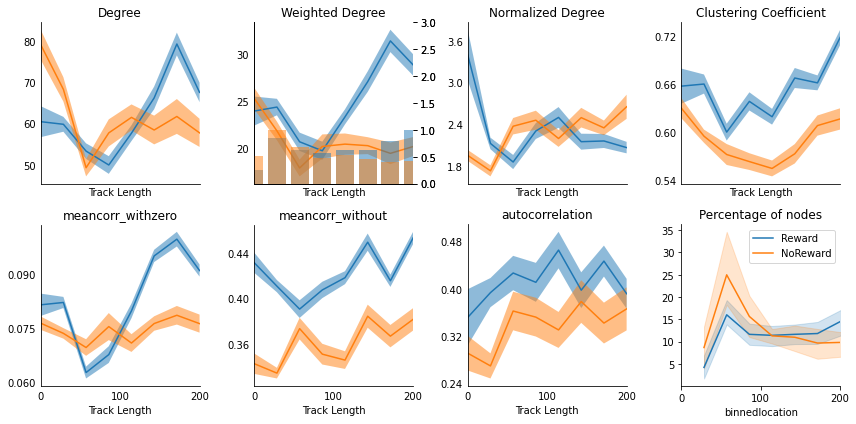

In [116]:
fs, ax = plt.subplots(2, 4, figsize=(12, 6), sharex='all')
ax=ax.flatten()
color = sns.color_palette()
ga.plot_binned_parameters(ax, columns, binned_df_Task1, count_Task1, plot_label='Reward', color=color[0])
ga.plot_binned_parameters(ax, columns, binned_df_Task3, count_Task3, plot_label='NoReward', color=color[1])
# ga.plot_binned_parameters(ax, columns, binned_df_Control, count_Control, plot_label='Control', color=color[2])
# ga.plot_binned_parameters(ax, columns, binned_df_shuffle, plot_label='shuffle')
ax[-1].legend();
fs.tight_layout()

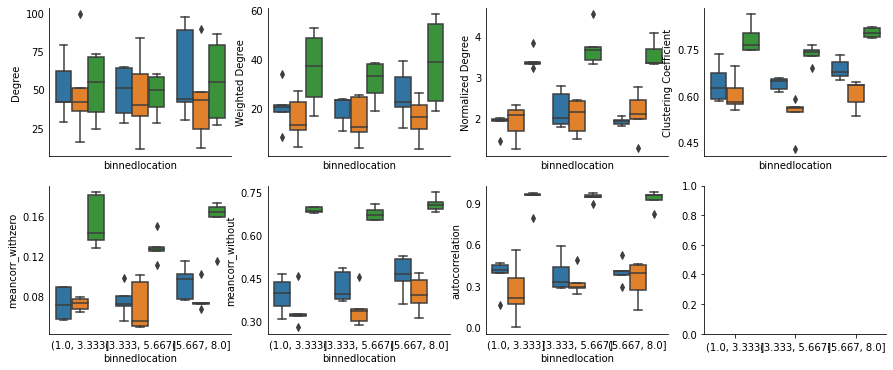

In [19]:
#Animalwise
animal_df = ga.get_mean_per_animal(pd.concat((csv_Task1, csv_Task3, csv_Control)), columns)
fs, ax = plt.subplots(2, 4, figsize=(15, 6), sharex='all')
ga.plot_mean_per_animal(ax.flatten(), columns, animal_df)

In [9]:
for t in [csv_Task1, csv_Task3, csv_Control]:
    data = t['autocorrelation']
    data = data[data!=0]
    plt.hist(data, bins=1000, density=True, cumulative=True, histtype='step')

NameError: name 'csv_Task1' is not defined

In [12]:
np.mean(())

0.8316867612121212

In [13]:
d = csv_Control['autocorrelation']
d = d[d!=0]

In [18]:
np.size(np.where(d>0.5))/np.size(d)

0.9690322580645161